# Image Stiching

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

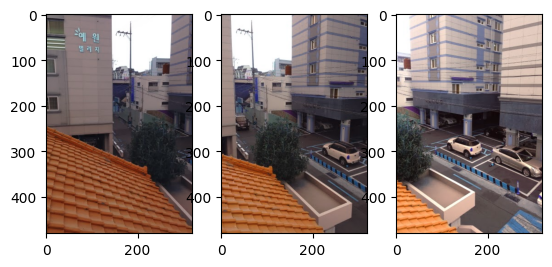

In [2]:
cwd = os.getcwd()
s1 = cv.imread(os.path.join('images','stiching','S1.jpg'))
s2 = cv.imread(os.path.join('images','stiching','S2.jpg'))
s3 = cv.imread(os.path.join('images','stiching','S3.jpg'))
s5 = cv.imread(os.path.join('images','stiching','S5.jpg'))
s6 = cv.imread(os.path.join('images','stiching','S6.jpg'))

# plt.imshow(s1)
# plt.imshow(s2)
# plt.show()

plt.subplot(1,3,1)
plt.imshow(s1)
plt.subplot(1,3,2)
plt.imshow(s2)
plt.subplot(1,3,3)
plt.imshow(s3)
plt.show()  


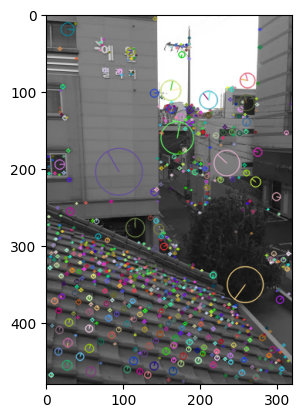

In [7]:
# SIFT detector
sift = cv.SIFT_create()
gs1 = cv.cvtColor(s1, cv.COLOR_BGR2GRAY)

kp1,des1 = sift.detectAndCompute(gs1, None)
img_kp1 = cv.drawKeypoints(gs1, kp1,gs1, flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.imshow(img_kp1)
plt.show()

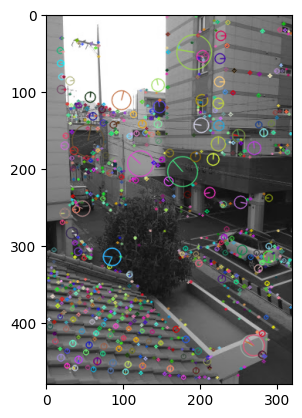

In [8]:
sift2 = cv.SIFT_create()
gs2 = cv.cvtColor(s2, cv.COLOR_BGR2GRAY)
kp2,des2 = sift.detectAndCompute(gs2, None)
img_kp2 = cv.drawKeypoints(gs2, kp2,gs2 ,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
plt.imshow(img_kp2)
plt.show()

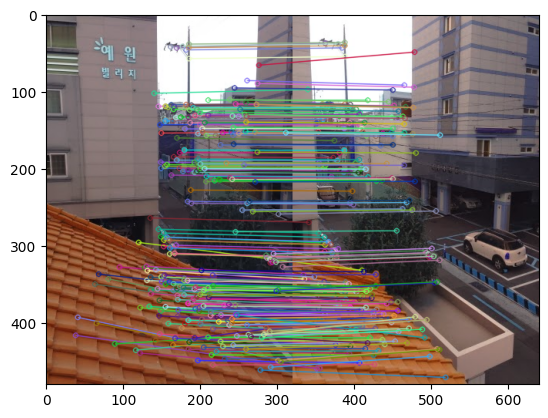

(<matplotlib.image.AxesImage at 0x7fe6c37334d0>, None)

In [15]:
# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1,des2,k=2)
 
# Apply ratio test
good = []
for m,n in matches:
    if m.distance < 0.75*n.distance:
        good.append([m])
 
# cv.drawMatchesKnn expects list of lists as matches.
img3 = cv.drawMatchesKnn(s1,kp1,s2,kp2,good,None,flags=cv.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
 
plt.imshow(img3),plt.show()

In [ ]:
print(kp1)
print(kp1[0])
print(kp1[0].pt)

(< cv2.KeyPoint 0x7fe6d4089b00>, < cv2.KeyPoint 0x7fe6d254b180>, < cv2.KeyPoint 0x7fe6d2548d80>, < cv2.KeyPoint 0x7fe6d2549d70>, < cv2.KeyPoint 0x7fe6d2549290>, < cv2.KeyPoint 0x7fe6d254bb10>, < cv2.KeyPoint 0x7fe6c86ffa20>, < cv2.KeyPoint 0x7fe6c86ff150>, < cv2.KeyPoint 0x7fe6c86fe1c0>, < cv2.KeyPoint 0x7fe6c86fe5b0>, < cv2.KeyPoint 0x7fe6c86feaf0>, < cv2.KeyPoint 0x7fe6c86fe640>, < cv2.KeyPoint 0x7fe6c86feb20>, < cv2.KeyPoint 0x7fe6c86fea60>, < cv2.KeyPoint 0x7fe6c86fe7f0>, < cv2.KeyPoint 0x7fe6c86fe430>, < cv2.KeyPoint 0x7fe6c86ff540>, < cv2.KeyPoint 0x7fe6c86ff270>, < cv2.KeyPoint 0x7fe6c86ff090>, < cv2.KeyPoint 0x7fe6c86fe400>, < cv2.KeyPoint 0x7fe6c86ff720>, < cv2.KeyPoint 0x7fe6c86fe3a0>, < cv2.KeyPoint 0x7fe6c86ffa50>, < cv2.KeyPoint 0x7fe6c86fe970>, < cv2.KeyPoint 0x7fe6c86fe880>, < cv2.KeyPoint 0x7fe6c86fea00>, < cv2.KeyPoint 0x7fe6c86ff450>, < cv2.KeyPoint 0x7fe6d2359d40>, < cv2.KeyPoint 0x7fe6d2358f90>, < cv2.KeyPoint 0x7fe6d2359fb0>, < cv2.KeyPoint 0x7fe6d235a400>, < cv2.K

In [ ]:
## Stich image using homography
if len(good) < 4:
    print("Error: Not enough matches found to compute homography.")





TypeError: tuple indices must be integers or slices, not list